# Workshop: JIT compilation with numba
<center> 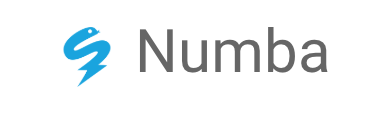 </center>


## Yulong


# Numba 
is an open-source JIT compiler that translates a subset of Python and NumPy into fast machine code
# JIT
Just-in-time compilation means the code gets compiled at run time. 
### 1. another way to compile: Ahead of Time (AOT)  at build time on the server
### 2. other compilers: cython, pypy

<center> 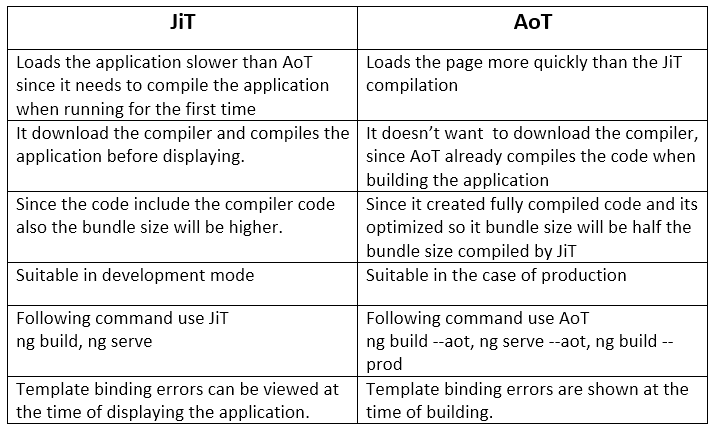 </center> 

eager about more these two guys <br>
credit: https://levelup.gitconnected.com/just-in-time-jit-and-ahead-of-time-aot-compilation-in-angular-8529f1d6fa9d

How the JIT works
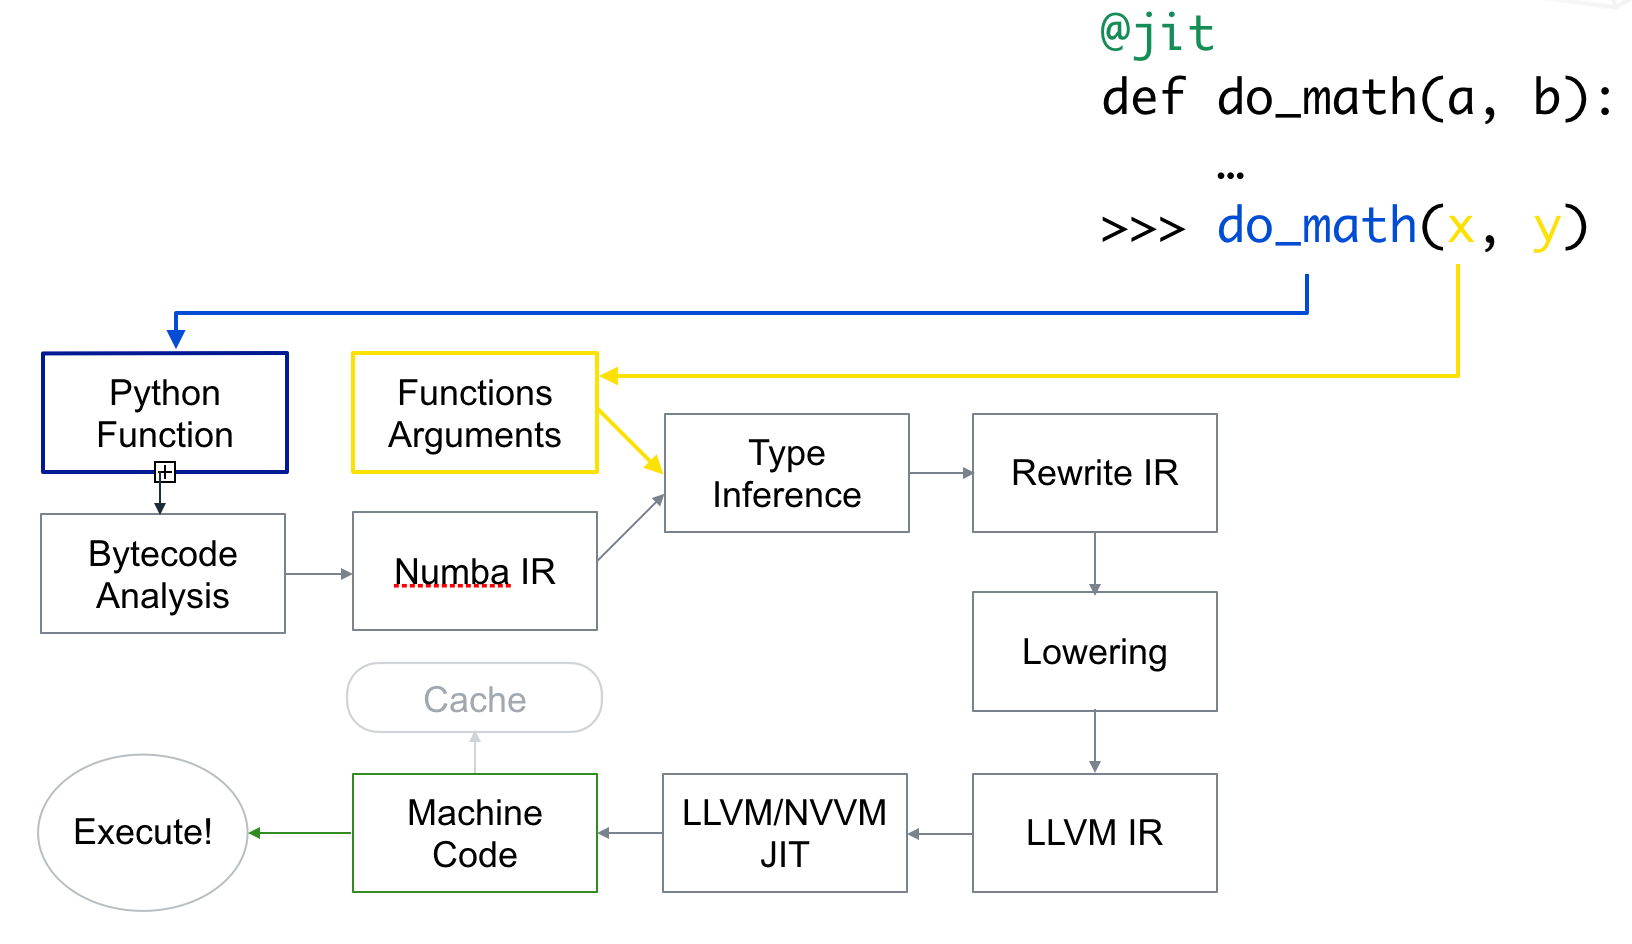

credit:https://towardsdatascience.com/speed-up-your-algorithms-part-2-numba-293e554c5cc1

# installation

## conda 
conda install numba

## pip 
pip install numba





# Are you eligible?
numerically orientated (does a lot of math), uses NumPy a lot and/or has a lot of loops

# how to nail it?
jsut add Numba’s JIT decorators, @jit,

In [ ]:
import numpy as np
import numba
from numba import jit
import time
A = np.random.random((30, 50))
B = np.random.random((50, 40))

In [ ]:
def matrix_multiply(A, B):
    m, n = A.shape
    n, p = B.shape
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i,j] += A[i,k] * B[k, j]
    return C

In [ ]:
@jit
def matrix_multiply_numba(A, B):
    m, n = A.shape
    n, p = B.shape
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i,j] += A[i,k] * B[k, j]
    return C

In [ ]:
%timeit matrix_multiply(A, B)
%timeit matrix_multiply_numba(A, B)

In [ ]:
def matrix_multiply_numpy(A, B):
    return A.dot(B)
%timeit matrix_multiply_numpy(A, B)

# official example with nopython mode

## The Numba @jit decorator fundamentally operates in two compilation modes, nopython mode and object mode.

nopython compilation mode, is to essentially compile the decorated function so that it will run entirely without the involvement of the Python interpreter. 

object mode, this is a fall back mode to identify loops that it can compile and compile those into functions that run in machine code, and it will run the rest of the code in the interpreter.

In [ ]:
x = np.arange(100).reshape(10, 10)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

print(go_fast(x))

# Basic usage

## lazy compilation 
to let Numba decide when and how to optimize:

In [ ]:
@jit
def f3(x, y):
    # A somewhat trivial example
    return x + y

## Eager compilation
tell Numba the function signature you are expecting

In [ ]:
@jit(int32(int32, int32))
def f3(x, y):
    # A somewhat trivial example
    return x + y

# Calling and inlining other functions

In [ ]:
@jit
def square(x):
    return x ** 2

@jit
def hypot(x, y):
    return math.sqrt(square(x) + square(y))

# Enables automatic parallelization 

In [ ]:
@jit(nopython=True, parallel=True)
def f3(x, y):
    return x + y

# The @vectorize decorator from numba

Numba’s vectorize allows Python functions taking scalar input arguments to be used as NumPy ufuncs

credit: http://numba.pydata.org/numba-doc/latest/user/5minguide.html

In [ ]:
from numba import vectorize, float64

@vectorize([float64(float64, float64)])
def f(x, y):
    return x + y

def f2(x, y):
    return x + y

In [ ]:
a = np.arange(6)

f(a,a)


In [ ]:
f2(a,a)

In [ ]:
f.types

In [ ]:
f2.types

In [ ]:
type(f)

In [ ]:
type(f2)